In [1]:
import matplotlib.pyplot as plt
import gym
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.agents import DQNAgent
from rl.memory import SequentialMemory

In [2]:
def build_model(height, width, channels, actions):
    model = Sequential()
    model.add(Convolution2D(32, (8, 8), strides=(4, 4),
              activation='relu', input_shape=(3, height, width, channels)))
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [3]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(
    ), attr='eps', value_max=1, value_min=.1, value_test=.2, nb_steps=100000)
    memory = SequentialMemory(limit=10000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                   enable_dueling_network=True, dueling_type='avg',
                   nb_actions=actions, nb_steps_warmup = 100000)
    return dqn

In [4]:
env = gym.make("Freeway-v0")
env = gym.wrappers.ResizeObservation(env, (88, 88))
height, width, channels = env.observation_space.shape
actions = env.action_space.n
model = build_model(height, width, channels, actions)

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 21, 21, 32)     6176      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 9, 9, 64)       32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 7, 7, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 9408)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4817408   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 7

In [6]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=0.01))
log = dqn.fit(env, nb_steps=100000, visualize=True, verbose=2)

Training for 100000 steps ...
/home/vinicius/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
  2731/100000: episode: 1, duration: 20.807s, episode steps: 2731, steps per second: 131, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.005 [0.000, 2.000],  loss: --, mean_q: --, mean_eps: --
  5461/100000: episode: 2, duration: 18.611s, episode steps: 2730, steps per second: 147, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 1.008 [0.000, 2.000],  loss: --, mean_q: --, mean_eps: --
  8187/100000: episode: 3, duration: 18.482s, episode steps: 2726, steps per second: 147, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 0.968 [0.000, 2.00

In [7]:
scores = dqn.test(env, nb_episodes = 10, visualize=True)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: 20.000, steps: 2735
Episode 2: reward: 22.000, steps: 2718
Episode 3: reward: 24.000, steps: 2710
Episode 4: reward: 22.000, steps: 2730
Episode 5: reward: 22.000, steps: 2723
Episode 6: reward: 22.000, steps: 2758
Episode 7: reward: 24.000, steps: 2733
Episode 8: reward: 23.000, steps: 2727
Episode 9: reward: 25.000, steps: 2707
Episode 10: reward: 21.000, steps: 2738
22.5


In [8]:
env.close()
dqn.save_weights('100K_dqn.h5f')

Text(0, 0.5, 'Score')

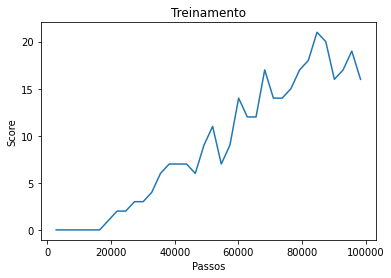

In [9]:
plt.plot(log.history['nb_steps'], log.history['episode_reward'])
plt.title("Treinamento")
plt.xlabel("Passos")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

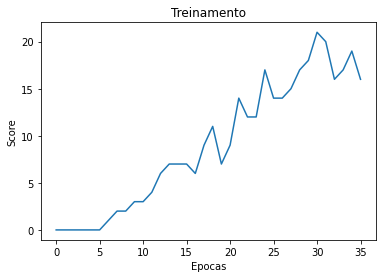

In [10]:
plt.plot(log.epoch, log.history['episode_reward'])
plt.title("Treinamento")
plt.xlabel("Epocas")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

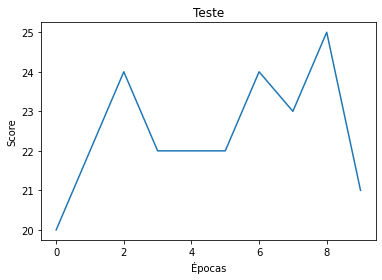

In [11]:
plt.plot(scores.epoch, scores.history['episode_reward'])
plt.title("Teste")
plt.xlabel("Épocas")
plt.ylabel("Score")

In [12]:
np.max(log.history['episode_reward'])

21.0

In [13]:
log.history

{'episode_reward': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  2.0,
  2.0,
  3.0,
  3.0,
  4.0,
  6.0,
  7.0,
  7.0,
  7.0,
  6.0,
  9.0,
  11.0,
  7.0,
  9.0,
  14.0,
  12.0,
  12.0,
  17.0,
  14.0,
  14.0,
  15.0,
  17.0,
  18.0,
  21.0,
  20.0,
  16.0,
  17.0,
  19.0,
  16.0],
 'nb_episode_steps': [2731,
  2730,
  2726,
  2750,
  2729,
  2731,
  2745,
  2734,
  2726,
  2748,
  2724,
  2715,
  2723,
  2751,
  2732,
  2721,
  2743,
  2725,
  2728,
  2723,
  2714,
  2738,
  2732,
  2739,
  2723,
  2737,
  2752,
  2741,
  2745,
  2737,
  2732,
  2759,
  2703,
  2737,
  2731,
  2749],
 'nb_steps': [2731,
  5461,
  8187,
  10937,
  13666,
  16397,
  19142,
  21876,
  24602,
  27350,
  30074,
  32789,
  35512,
  38263,
  40995,
  43716,
  46459,
  49184,
  51912,
  54635,
  57349,
  60087,
  62819,
  65558,
  68281,
  71018,
  73770,
  76511,
  79256,
  81993,
  84725,
  87484,
  90187,
  92924,
  95655,
  98404]}